#  Loan Sanction Amount Prediction and Model Evaluation

This project focuses on predicting **Loan Sanction Amounts** based on applicant profiles using **regression models**.  
It involves thorough **data visualization**, **feature selection**, **handling missing values**, and **training three machine learning models**: Linear Regression, Decision Tree Regressor, and Random Forest Regressor.  
The models are evaluated using metrics like **R² Score** and **Mean Squared Error (MSE)**, with visual comparisons to identify the best-performing algorithm.

Key stages:
- Exploratory Data Analysis (EDA)
- Feature Engineering and Data Cleaning
- Model Training and Prediction
- Model Evaluation and Comparison
- Insights and Conclusion


### 1. Import Necessary Libraries

We import:
- `pandas` for data manipulation,
- `numpy` for numerical operations,
- `matplotlib.pyplot` for plotting,
- `seaborn` for advanced visualizations.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from termcolor import colored

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="pastel")


### 2. Load the Dataset
We load the **loan.csv** dataset into a pandas DataFrame `df`.

In [16]:
df = pd.read_csv("Loan 2.csv")
df

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,...,869.61,0,Unpossessed,566,4969.41,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,...,729.41,0,Inactive,175,1606.88,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,NaN,Low,Working,Sales staff,Urban,81410.08,...,NaN,0,Active,959,NaN,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,...,677.27,1,Unpossessed,375,2417.71,4,Urban,1,168194.47,99766.87


### 3. View the Info
Display the information about the dataset to understand its structure.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

### 4. Generate Summary Statistics
Use `describe()` to compute standard descriptive statistics for numerical features.


In [18]:
df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091408e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [19]:
df.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

### 5. Clean Column Names
Strip any leading or trailing whitespace from all column names to ensure consistency and avoid errors during column access.


In [20]:
df.columns = df.columns.str.strip()

### 6. Check for Missing Values
Sum the number of missing (NaN) entries in each column to identify incomplete data.


In [21]:
df.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

### 7. Visualize Missing Values
Create a heatmap to visually inspect the missing values across the dataset:
- Set figure size to `(14, 10)` with a white background.
- Use a purple color palette to highlight missing (`NaN`) entries.


<Axes: >

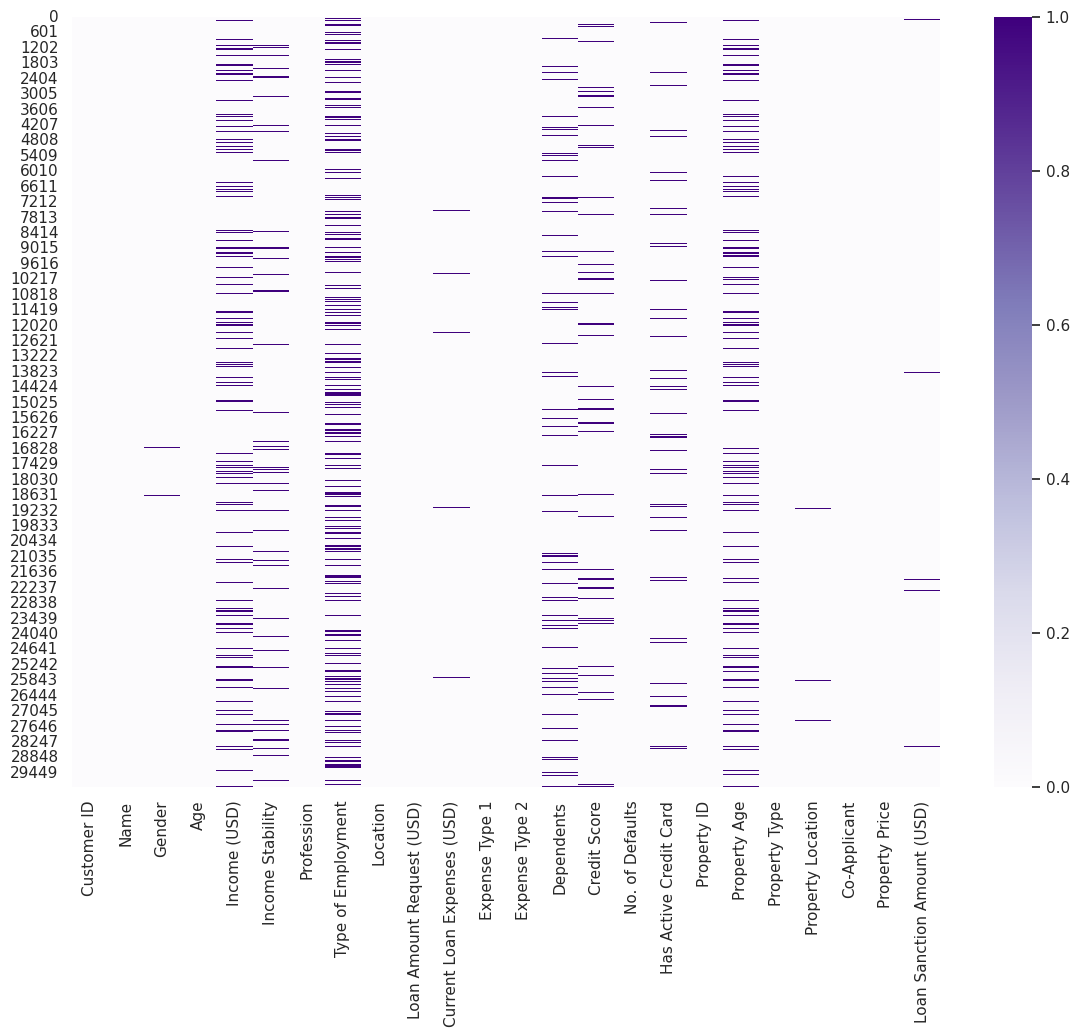

In [22]:
plt.figure(figsize=(14, 10), facecolor="white")
sns.heatmap(df.isnull(), 
            cmap="Purples")


### 8. Missing Values Treatment

We define a helper function `pastel_print` to print colorful status messages for better readability.

We then systematically handle missing values:
- **Gender**: Filled missing values with the most frequent category (mode).
- **Income (USD)**: Filled missing values using the median income **within each Profession group**.
- **Income Stability**: Filled missing values with the mode.
- **Type of Employment**: Missing values replaced with `'Unknown'`.
- **Current Loan Expenses (USD)**: Filled using the median value.
- **Dependents**: Filled missing values with the mode.
- **Credit Score**: Filled missing values with the median value.
- **Has Active Credit Card**: Filled missing values with the mode.
- **Property Age**: Filled missing values with the median value.
- **Property Location**: Filled missing values with the mode.
- **Loan Sanction Amount (USD)**: Filled using the median value.

Finally:
- Display a **summary of remaining missing values**.
- Confirm that missing value cleaning is **completed**.

Throughout the process, colorful printed messages are used to indicate progress.


In [50]:
from rich.console import Console
from rich.text import Text
from rich.panel import Panel
from rich import box

console = Console()

def elegant_print(text, hex_color="#000000", style="bold"):  # Default color is black for all text
    console.print(Text(text, style=f"{style} {hex_color}"))

# Clean divider with black to purple shades
def divider():
    console.rule("[#000000]──────────────────────────────────────[#4B0082]──────────────────────────────────────[#6A5ACD]")

# Start Cleaning
divider()
elegant_print("Starting Missing Values Treatment...",hex_color="#6A5ACD")  

# Gender - fill with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
elegant_print("Filled missing 'Gender' with mode.")  # Text in black, value in default style

# Income (USD) - fill with median based on Profession
df['Income (USD)'] = df.groupby('Profession')['Income (USD)'].transform(lambda x: x.fillna(x.median()))
elegant_print("Filled missing 'Income (USD)' using median of Profession group.")  # Text in black

# Income Stability - fill with mode
df['Income Stability'].fillna(df['Income Stability'].mode()[0], inplace=True)
elegant_print("Filled missing 'Income Stability' with mode.")

# Type of Employment - fill with 'Unknown'
df['Type of Employment'].fillna('Unknown', inplace=True)
elegant_print("Filled missing 'Type of Employment' with 'Unknown'.")

# Current Loan Expenses (USD) - fill with median
df['Current Loan Expenses (USD)'].fillna(df['Current Loan Expenses (USD)'].median(), inplace=True)
elegant_print("Filled missing 'Current Loan Expenses (USD)' with median.")

# Dependents - fill with mode
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
elegant_print("Filled missing 'Dependents' with mode.")

# Credit Score - fill with median
df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)
elegant_print("Filled missing 'Credit Score' with median.")

# Has Active Credit Card - fill with mode
df['Has Active Credit Card'].fillna(df['Has Active Credit Card'].mode()[0], inplace=True)
elegant_print("Filled missing 'Has Active Credit Card' with mode.")

# Property Age - fill with median
df['Property Age'].fillna(df['Property Age'].median(), inplace=True)
elegant_print("Filled missing 'Property Age' with median.")

# Property Location - fill with mode
df['Property Location'].fillna(df['Property Location'].mode()[0], inplace=True)
elegant_print("Filled missing 'Property Location' with mode.")

# Loan Sanction Amount (USD) - fill with median
df['Loan Sanction Amount (USD)'].fillna(df['Loan Sanction Amount (USD)'].median(), inplace=True)
elegant_print("Filled missing 'Loan Sanction Amount (USD)' with median.")

# Final Summary
divider()
elegant_print("Final Missing Values Summary:",hex_color="#6A5ACD")

# Only numbers will have black to purple gradient
console.print(df.isnull().sum(), style="bold #000000")  # Text remains black, numbers will show gradient

# Completion
divider()
console.print(Panel.fit("Missing Values Cleaning Completed.", style="bold #6A5ACD", box=box.SQUARE))
divider()


────────────────── ──────────────────────────────────────────────────────────────────────────── ───────────────────

Starting Missing Values Treatment...

Filled missing 'Gender' with mode.

Filled missing 'Income (USD)' using median of Profession group.

Filled missing 'Income Stability' with mode.

Filled missing 'Type of Employment' with 'Unknown'.

Filled missing 'Current Loan Expenses (USD)' with median.

Filled missing 'Dependents' with mode.

Filled missing 'Credit Score' with median.

Filled missing 'Has Active Credit Card' with mode.

Filled missing 'Property Age' with median.

Filled missing 'Property Location' with mode.

Filled missing 'Loan Sanction Amount (USD)' with median.

────────────────── ──────────────────────────────────────────────────────────────────────────── ───────────────────

Final Missing Values Summary:

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   1
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

────────────────── ──────────────────────────────────────────────────────────────────────────── ───────────────────

┌────────────────────────────────────┐
│ Missing Values Cleaning Completed. │
└────────────────────────────────────┘

────────────────── ──────────────────────────────────────────────────────────────────────────── ───────────────────

### 9. Handle Duplicates and Identify Categorical Columns

- **Drop Duplicates**:  
  Remove any duplicate rows from the dataset using `drop_duplicates()`.

- **Identify Categorical Columns**:  
  Use `select_dtypes(include='object')` to list all columns containing categorical (non-numeric) data types.

- **Check Remaining Duplicates**:  
  Use `duplicated().sum()` to confirm if any duplicate rows still exist after the cleaning.


In [51]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [52]:
df.select_dtypes(include='object').columns   #categorical columns

Index(['Customer ID', 'Name', 'Gender', 'Income Stability', 'Profession',
       'Type of Employment', 'Location', 'Expense Type 1', 'Expense Type 2',
       'Has Active Credit Card', 'Property Location'],
      dtype='object')

In [53]:
df.duplicated().sum()

np.int64(0)

### 10. Visualize Categorical Columns

We define a function `visualize_categorical_columns(df)` to automate the visualization of all categorical features:
- **Excluded Columns**: Skip plotting `Customer ID` and `Name`, as they are identifiers and not useful for distribution analysis.
- **Dynamic Layout**: Automatically calculate the number of rows needed based on the number of categorical columns.
- **Plotting**:
  - For each categorical feature:
    - Plot a pastel-themed barplot showing the distribution.
    - If a feature has more than 10 unique categories, display only the top 10.
  - Set stylish titles, rotated x-axis labels, and remove extra empty subplots.
- **Final Touches**: 
  - Adjust layout for neat spacing.
  - Add an overarching title: **"Categorical Column Distributions"**.
  - Show the complete figure.

Finally, we call `visualize_categorical_columns(df)` to execute the visualization.


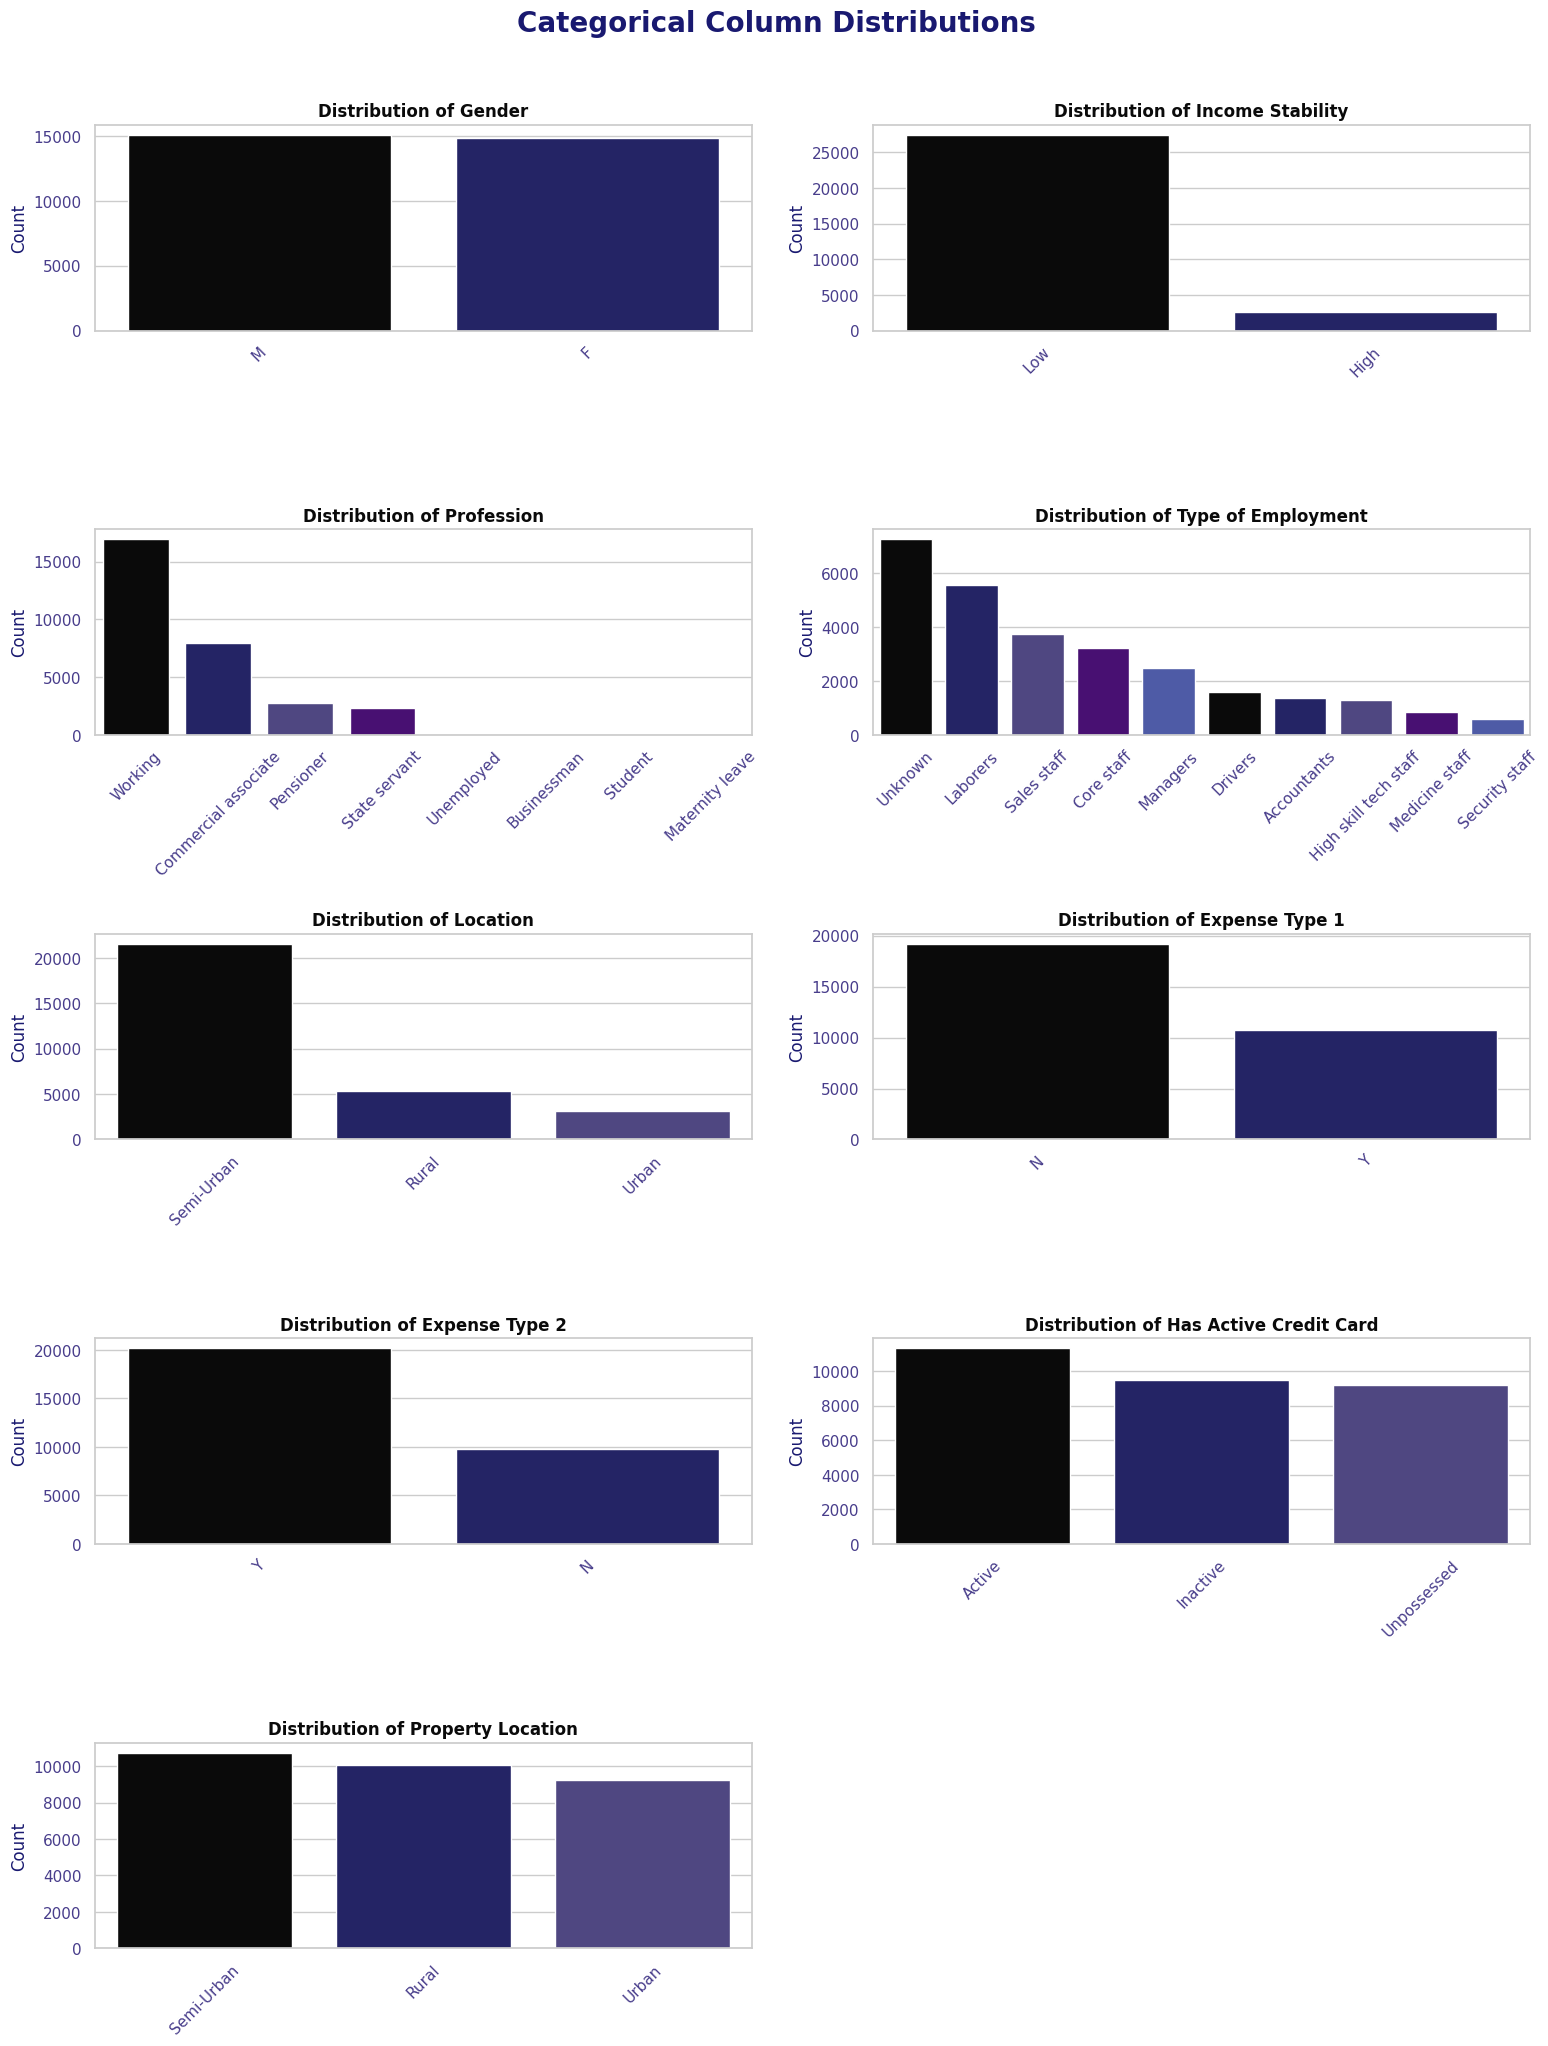

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Smart categorical plot with a black-to-blue/purple minimalistic theme
def visualize_categorical_columns(df):
    skip_cols = ['Customer ID', 'Name']

    categorical_cols = df.select_dtypes(include='object').columns
    categorical_cols = [col for col in categorical_cols if col not in skip_cols]

    n_cols = 2
    n_rows = (len(categorical_cols) + 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
    axes = axes.flatten()

    # Professional custom palette (black to blue/purple)
    custom_palette = ['#0A0A0A', '#191970', '#483D8B', '#4B0082', '#3F51B5']

    for i, col in enumerate(categorical_cols):
        ax = axes[i]
        value_counts = df[col].value_counts()

        if len(value_counts) > 10:
            value_counts = value_counts[:10]

        sns.barplot(x=value_counts.index, y=value_counts.values, palette=custom_palette, ax=ax)
        ax.set_title(f"Distribution of {col}", fontsize=12, fontweight='bold', color='#0A0A0A')  # black
        ax.set_xlabel('')
        ax.set_ylabel('Count', color='#191970')  # midnight blue
        ax.tick_params(axis='x', rotation=45, colors='#483D8B')  # dark slate blue
        ax.tick_params(axis='y', colors='#483D8B')

    # Turn off any extra axes
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(pad=2.0)
    plt.suptitle("Categorical Column Distributions", fontsize=20, y=1.03, color='#191970', fontweight='bold')
    plt.show()

# Run
visualize_categorical_columns(df)


### 11. Visualize Numerical Columns

We visualize the distribution and outliers of all numerical features side-by-side:

- **Select Numerical Columns**:  
  Identify columns with data types `int64` or `float64`.

- **Set Up the Plot Layout**:  
  - Create a subplot grid with **2 columns** (Histogram and Boxplot for each feature).
  - Number of rows matches the number of numerical columns.
  - Adjust spacing for clear visualization.

- **Plotting for Each Numerical Feature**:
  - **Histogram**:
    - Plot a distribution plot with a Kernel Density Estimate (KDE) over it.
    - Use a soft `skyblue` color with black edges.
  - **Boxplot**:
    - Plot a boxplot to detect outliers.
    - Use a `lightcoral` color.

- **Finishing Touches**:
  - Set appropriate titles for each subplot.
  - Add an overall figure title: **"Numerical Columns Overview"**.
  - Apply a clean, tight layout for the whole figure.

Finally, display all plots together to inspect distributions and outliers at once.


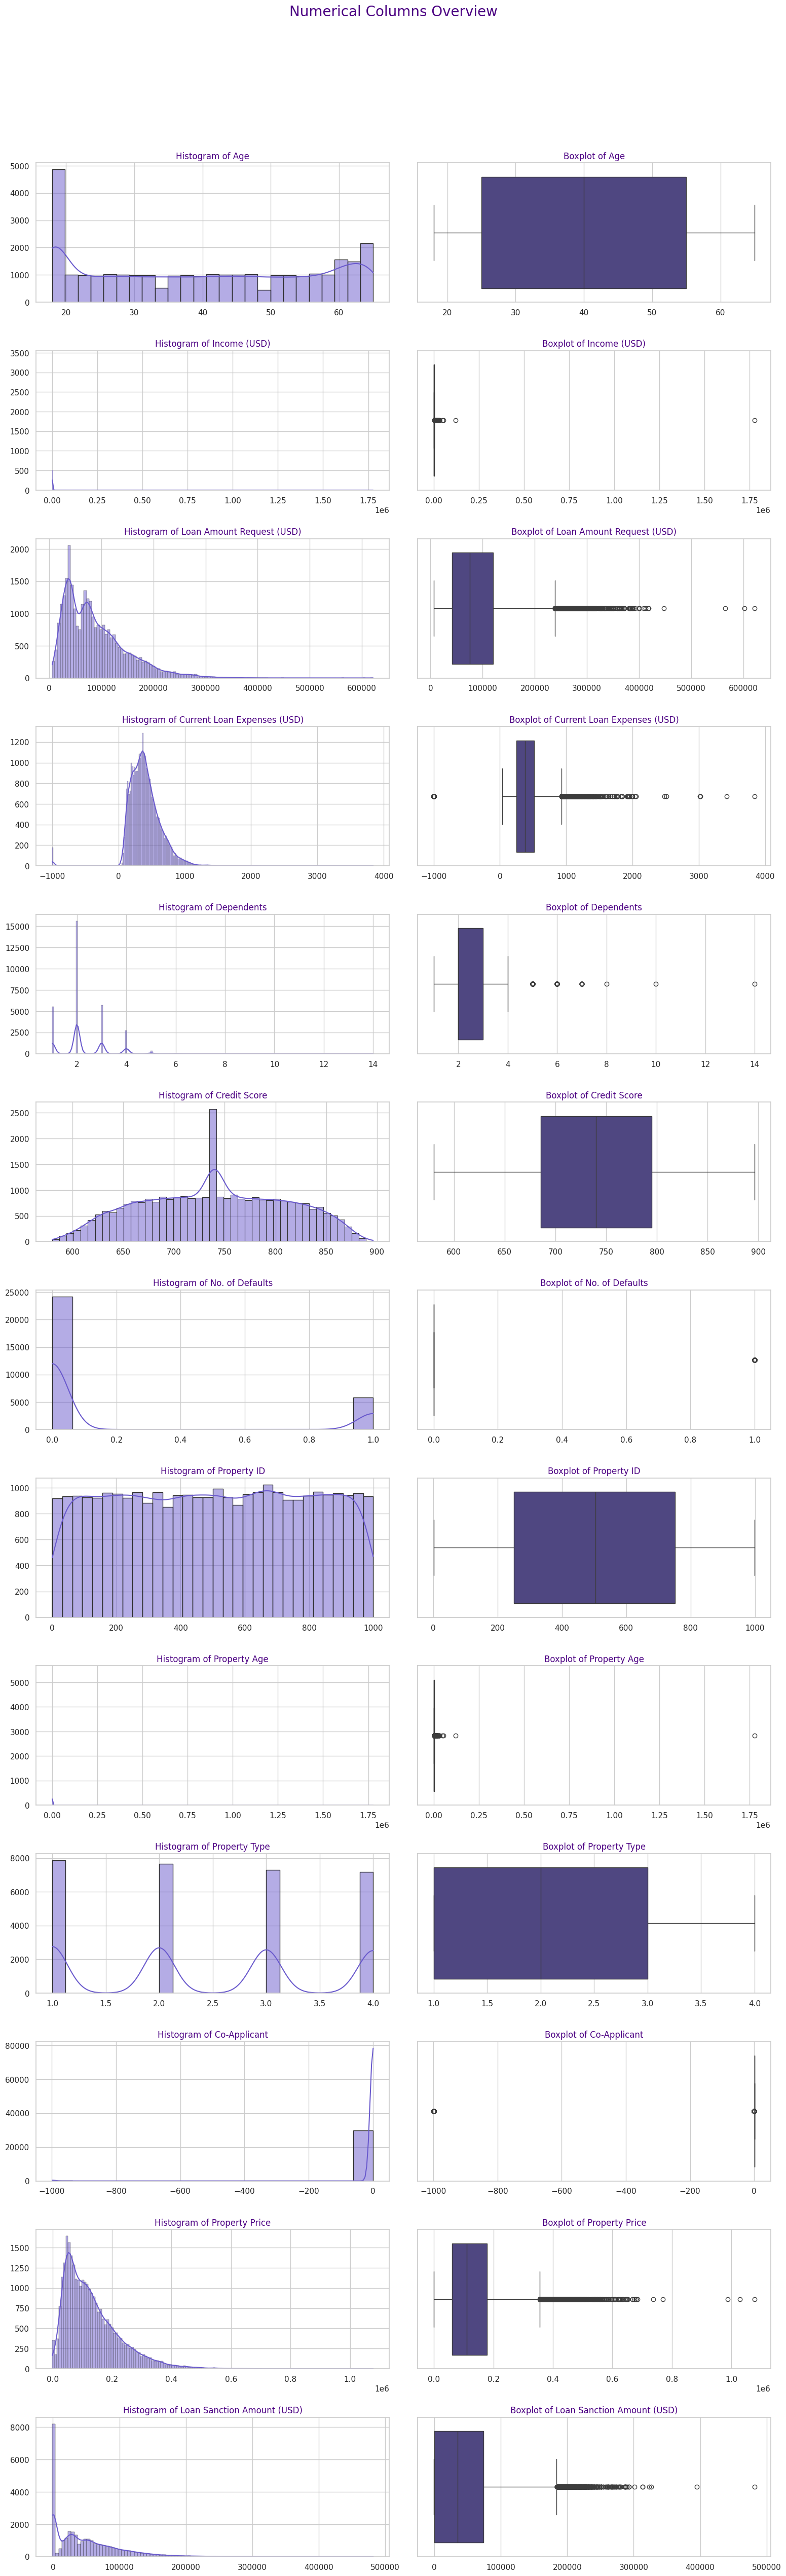

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure
n_cols = 2  # Histogram and Boxplot side by side
n_rows = len(numerical_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Plot each numerical column
for idx, col in enumerate(numerical_cols):
    # Histogram
    sns.histplot(df[col], kde=True, color='#6A5ACD', edgecolor='#2E2E2E', ax=axes[idx, 0])
    axes[idx, 0].set_title(f"Histogram of {col}", fontsize=12, color='#4B0082')
    axes[idx, 0].set_xlabel("")
    axes[idx, 0].set_ylabel("")
    
    # Boxplot
    sns.boxplot(x=df[col], color='#483D8B', ax=axes[idx, 1])
    axes[idx, 1].set_title(f"Boxplot of {col}", fontsize=12, color='#4B0082')
    axes[idx, 1].set_xlabel("")
    axes[idx, 1].set_ylabel("")

# Improve layout
fig.tight_layout(pad=2.0)
fig.subplots_adjust(top=0.92)  # Adjust top space for title

# Overall title
plt.suptitle("Numerical Columns Overview", fontsize=20, color='#4B0082')

# Show plot
plt.show()



### 12. Distribution of Type of Employment

- **Set the Theme**:  
  Apply Seaborn's `whitegrid` style with a `pastel` color palette for a soft, clean visual look.

- **Create the Bar Plot**:
  - Plot the distribution of the `Type of Employment` feature.
  - Use a pastel color scheme for the bars.
  - Set the figure size to `(8, 5)` for a balanced display.
  - Rotate x-axis labels by 45 degrees for better readability.

- **Finalize the Plot**:
  - Add a title: **"Distribution of Type of Employment"**.
  - Label the axes appropriately.
  - Use `tight_layout()` to prevent overlaps.

Finally, display the plot.


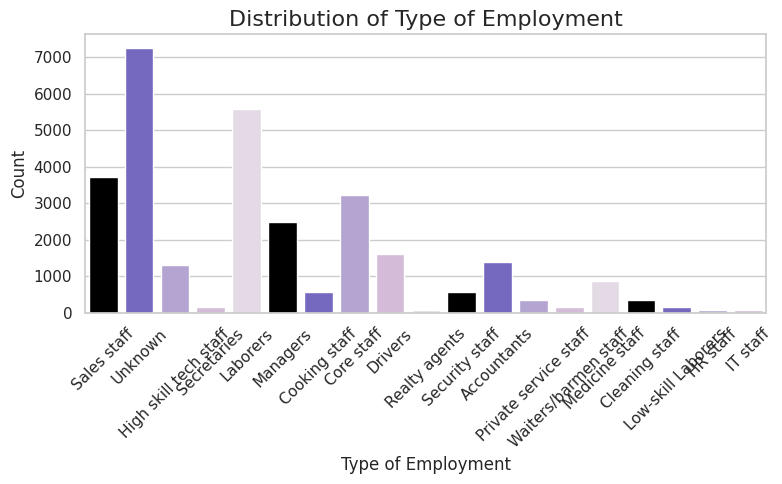

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom pastel purple color palette
custom_palette = ['#000000', '#6A5ACD', '#B19CD9', '#D8B7DD', '#E6D8E8']

# Set the custom theme
sns.set_theme(style="whitegrid")

# Bar Plot with custom black to pastel purple palette
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Type of Employment', palette=custom_palette)
plt.title('Distribution of Type of Employment', fontsize=16)
plt.xlabel('Type of Employment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 13. Income Stability Distribution

- **Prepare Data**:  
  Count the occurrences of each category in the `Income Stability` feature.

- **Create the Pie Chart**:
  - Set the figure size to `(6, 6)` for a perfect square.
  - Plot a pastel-themed pie chart showing the percentage of each income stability category.
  - Display percentage values (`autopct='%1.1f%%'`) on the slices.
  - Start the first slice at a 140-degree angle for a balanced look.
  - Use `axis('equal')` to ensure the pie chart appears circular.

- **Finalize the Plot**:
  - Add a title: **"Income Stability Distribution"**.
  - Display the chart.

This visualization helps quickly understand the proportion of individuals with stable vs unstable income.


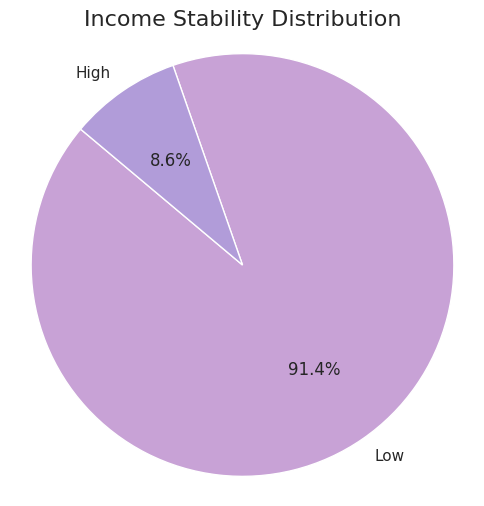

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom pastel purple to BTS purple blend color palette
custom_palette = ['#C8A2D6', '#B19CD9', '#9B30FF', '#7A4DFF', '#6A5ACD']

# Income Stability counts
income_stability_counts = df['Income Stability'].value_counts()

# Pie Chart with the custom pastel purple to BTS purple palette
plt.figure(figsize=(6, 6))
plt.pie(income_stability_counts, labels=income_stability_counts.index, 
        autopct='%1.1f%%', startangle=140, 
        colors=custom_palette)
plt.title('Income Stability Distribution', fontsize=16)
plt.axis('equal')  # Circle shape
plt.show()


### 14. Income (USD) Distribution

- **Create the KDE Plot**:
  - Plot the Kernel Density Estimate (KDE) curve for the `Income (USD)` feature.
  - Use a soft `skyblue` color with filled area and a smooth 2-pixel line width.

- **Adjust the Axis**:
  - Limit the x-axis range to `0–100,000` USD to focus on typical income values and ignore extreme outliers.

- **Finalize the Plot**:
  - Add a title: **"Income (USD) Distribution"**.
  - Label both x-axis and y-axis.
  - Apply `tight_layout()` for a clean and non-overlapping layout.

Finally, display the distribution plot to visualize the spread of income levels among individuals.


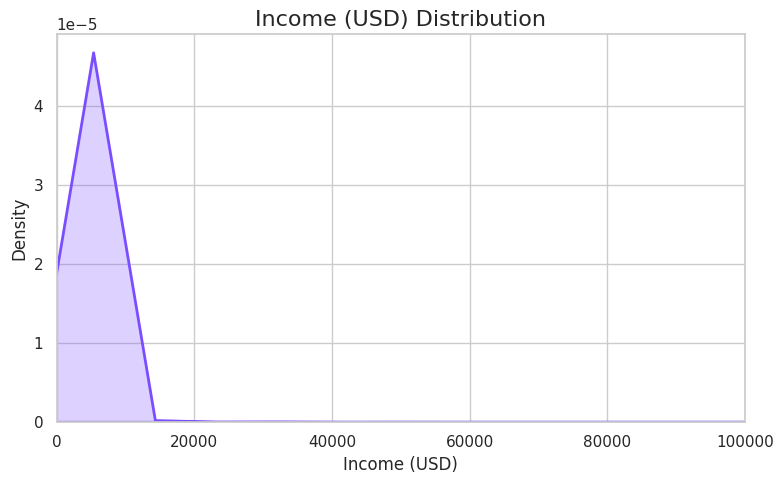

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom purple gradient for the KDE plot
custom_palette = ['#6A5ACD', '#7A4DFF', '#9B30FF', '#8A2BE2', '#4B0082']

# Set the KDE plot style with a custom color
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Income (USD)', fill=True, color='#7A4DFF', linewidth=2)  # Use BTS purple or desired color
plt.xlim(0, 100000)  # Only show incomes up to $100k
plt.title('Income (USD) Distribution', fontsize=16)
plt.xlabel('Income (USD)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


### 15. Income vs Loan Amount Requested

- **Create the Scatter Plot**:
  - Plot `Income (USD)` on the x-axis and `Loan Amount Request (USD)` on the y-axis.
  - Use the color `orchid` with `alpha=0.7` for slightly transparent points to better visualize dense areas.

- **Adjust Axis and Grid**:
  - Limit the x-axis to `0–70,000` USD to focus on the densest cluster of data points.
  - Add a grid with dashed lines and reduced opacity for better readability.

- **Finalize the Plot**:
  - Add a title: **"Income vs Loan Amount Requested"**.
  - Label both x-axis and y-axis with larger font sizes for clarity.

Finally, display the scatter plot to observe how income levels relate to loan amount requests.


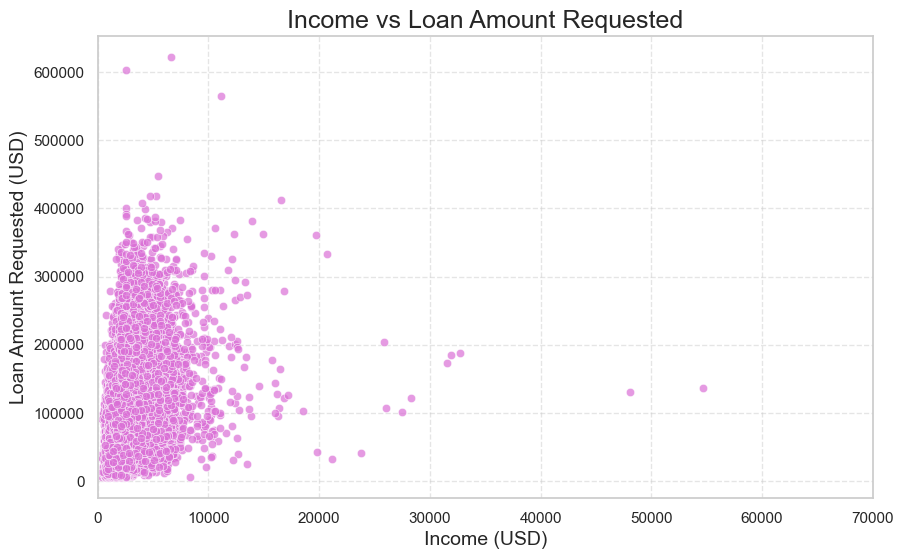

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Income (USD)', y='Loan Amount Request (USD)',color='orchid', alpha=0.7)
plt.title('Income vs Loan Amount Requested', fontsize=18)
plt.xlabel('Income (USD)', fontsize=14)
plt.ylabel('Loan Amount Requested (USD)', fontsize=14)
plt.xlim(0, 70000)   # <-- Setting a smaller x-axis limit to focus on dense area
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### 16. Income Distribution Across Professions

- **Create the Boxplot**:
  - Visualize the distribution of `Income (USD)` across different `Profession` categories.
  - Use a pastel color palette for a clean, soft appearance.

- **Adjust Axis and Grid**:
  - Limit the y-axis to `0–130,000` USD to focus on the typical income range.
  - Rotate x-axis labels by 45 degrees and align them to the right (`ha='right'`) for better readability.
  - Add a dashed grid with slight transparency for enhanced visual clarity.

- **Finalize the Plot**:
  - Add a title: **"Income Distribution Across Professions"**.
  - Label both x-axis and y-axis appropriately.
  - Use `tight_layout()` to ensure neat spacing.

Finally, display the boxplot to compare how income varies across different professions.


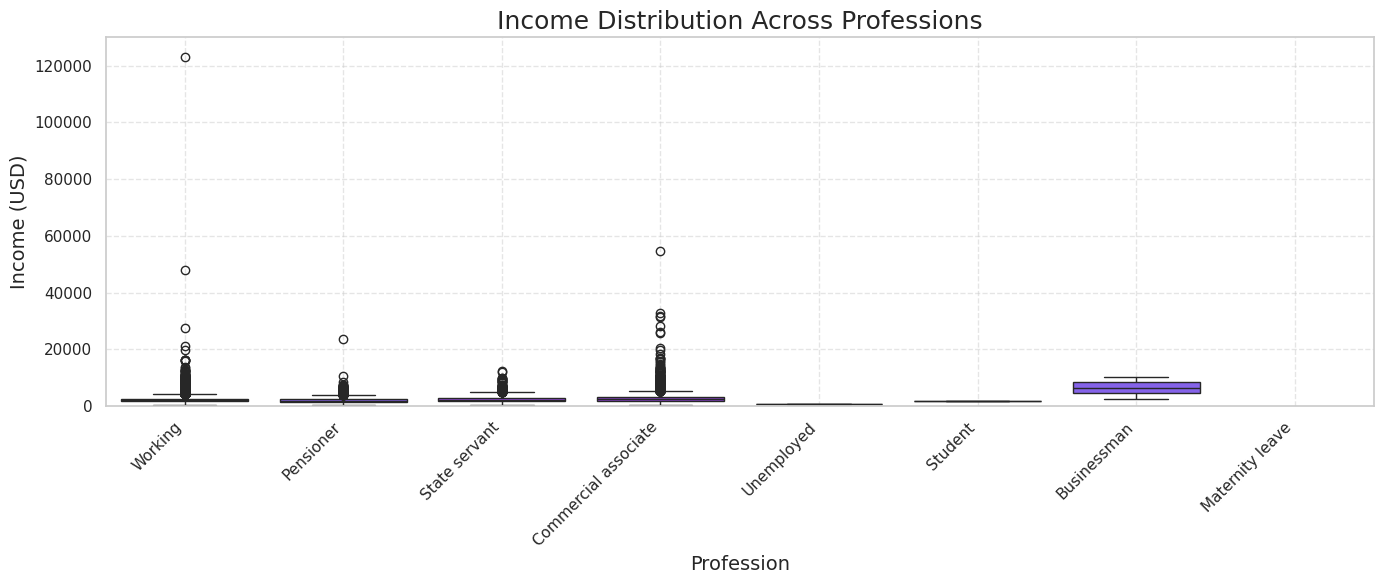

In [67]:
custom_palette = ['#6A5ACD', '#7A4DFF', '#9B30FF', '#8A2BE2', '#4B0082']

# Boxplot with custom color palette
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Profession', y='Income (USD)', palette=custom_palette)
plt.ylim(0, 130000)  # Limit y-axis
plt.title('Income Distribution Across Professions', fontsize=18)
plt.xlabel('Profession', fontsize=14)
plt.ylabel('Income (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 17. Credit Score Distribution: Defaults vs Non-Defaults

- **Create the KDE Plots**:
  - Plot two separate KDE curves for `Credit Score`:
    - One for individuals with **no defaults** (`No. of Defaults = 0`), colored **magenta**.
    - One for individuals with **at least one default** (`No. of Defaults = 1`), colored **blue**.
  - Set `fill=False` for clearer, overlapping line plots.
  - Use `common_norm=False` to keep their distributions independent and comparable.

- **Add Reference Line**:
  - Draw a dashed vertical line at a credit score of **700** as a threshold reference.
  - Style the line in `lightgrey` with moderate thickness for subtle emphasis.

- **Finalize the Plot**:
  - Add a title: **"Normalized Credit Score Distribution: Defaults vs Non-Defaults"**.
  - Label the x-axis and y-axis accordingly.
  - Include a legend to differentiate between defaults and non-defaults.
  - Add a dashed, semi-transparent grid for easier reading of the curves.

Finally, display the plot to visually compare credit score patterns between defaulters and non-defaulters.


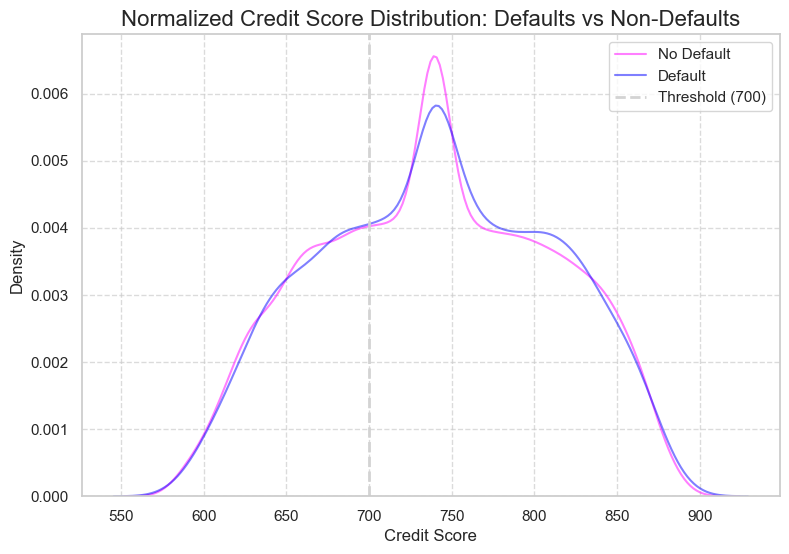

In [21]:
plt.figure(figsize=(9,6))
sns.kdeplot(
    data=df[df['No. of Defaults'] == 0], 
    x='Credit Score', 
    fill=False, 
    common_norm=False,  # Important: don't combine the areas
    color='magenta', 
    label='No Default', 
    alpha=0.5
)
sns.kdeplot(
    data=df[df['No. of Defaults'] == 1], 
    x='Credit Score', 
    fill=False, 
    common_norm=False,
    color='blue', 
    label='Default', 
    alpha=0.5
)

plt.axvline(x=700, color='lightgrey', linestyle='--', linewidth=2, label='Threshold (700)')

plt.title('Normalized Credit Score Distribution: Defaults vs Non-Defaults', fontsize=16)
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### 18. Age vs Credit Score by Gender

- **Create the Scatter Plot**:
  - Plot `Age` on the x-axis and `Credit Score` on the y-axis.
  - Differentiate points by `Gender` using the `Set2` pastel color palette.
  - Set `alpha=0.7` for semi-transparent points to better visualize overlaps.

- **Enhance the Plot**:
  - Add a legend titled **"Gender"** to clarify color coding.
  - Include a dashed grid (`--`) with slight transparency (`alpha=0.5`) for better readability.

- **Finalize the Plot**:
  - Add a title: **"Age vs Credit Score by Gender"**.
  - Label both x and y axes.
  - Apply `tight_layout()` to avoid any element overlap.

Finally, display the scatter plot to observe how credit scores vary across different ages and genders.


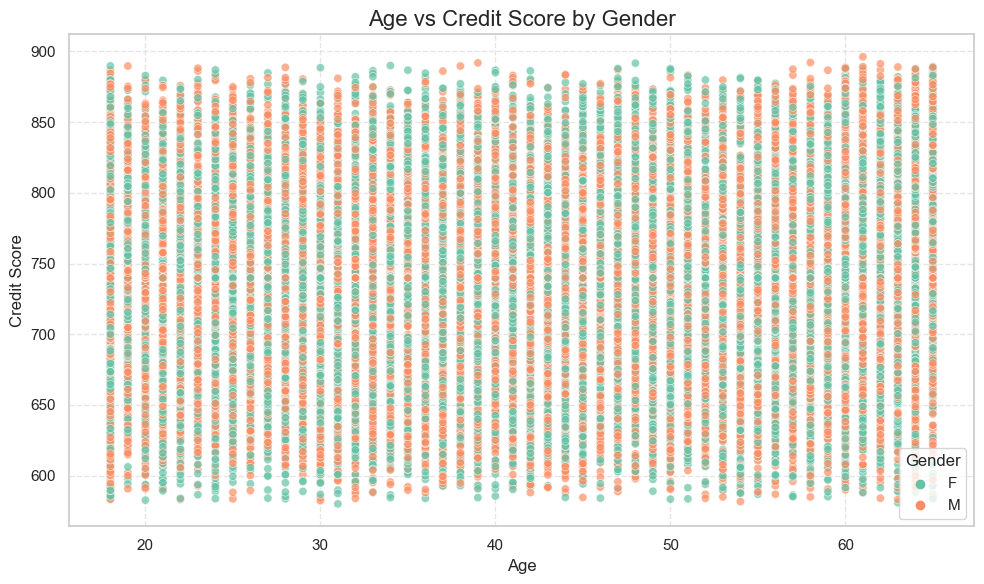

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, 
    x='Age', 
    y='Credit Score', 
    hue='Gender', 
    palette='Set2',
    alpha=0.7
)
plt.title('Age vs Credit Score by Gender', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


### 19. Property Price vs Loan Sanction Amount with Regression Line

- **Create the Regression Plot**:
  - Plot `Property Price` on the x-axis and `Loan Sanction Amount (USD)` on the y-axis.
  - Scatter points are styled with:
    - `white` fill color,
    - `purple` edges,
    - Semi-transparency (`alpha=0.5`) to handle dense areas.
  - Draw a best-fit regression line using a solid


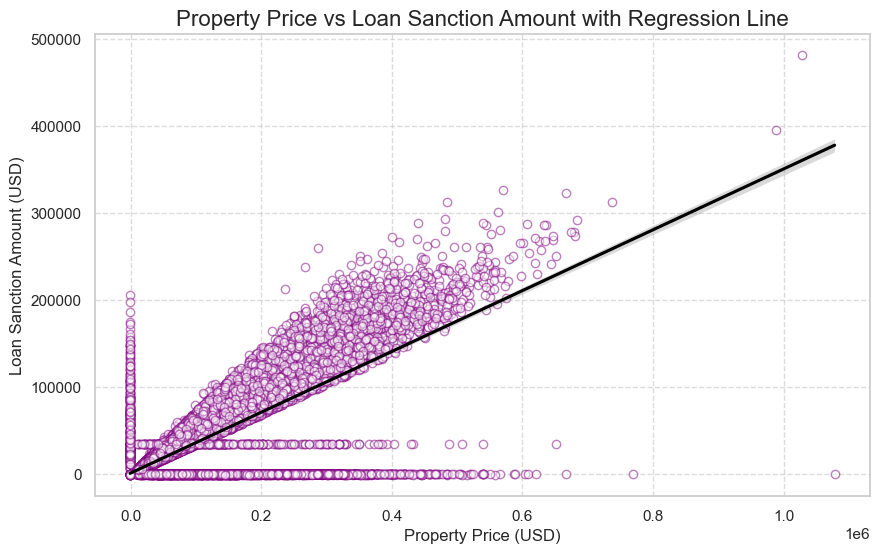

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='Property Price',
    y='Loan Sanction Amount (USD)',
    scatter_kws={'alpha':0.5, 'color':'white', 'edgecolor': 'purple'},
    line_kws={'color':'black'},
)

plt.title('Property Price vs Loan Sanction Amount with Regression Line', fontsize=16)
plt.xlabel('Property Price (USD)', fontsize=12)
plt.ylabel('Loan Sanction Amount (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### 20. Distributions of Key Numerical Features

- **Select Important Features**:
  - Focus on six key features: `Age`, `Income (USD)`, `Credit Score`, `Loan Amount Request (USD)`, `Loan Sanction Amount (USD)`, and `Property Price`.

- **Create Multiple Histograms**:
  - Use a **2x3 grid** layout to plot all distributions in one figure.
  - Apply a pastel color palette and `whitegrid` style for a clean, aesthetic look.
  - Each histogram includes a Kernel Density Estimate (KDE) overlay to show the smooth distribution.

- **Enhance the Visuals**:
  - Edge color set to black for each bar to enhance separation.
  - Individual colors assigned from the pastel palette for diversity.
  - Titles and axis labels are added for every subplot.

- **Finalize the Layout**:
  - Use `tight_layout()` to avoid overlaps between subplots.
  - Display the entire figure for easy comparison of distributions.

This visualization offers a quick overview of the distribution patterns for the major numerical features in the dataset.


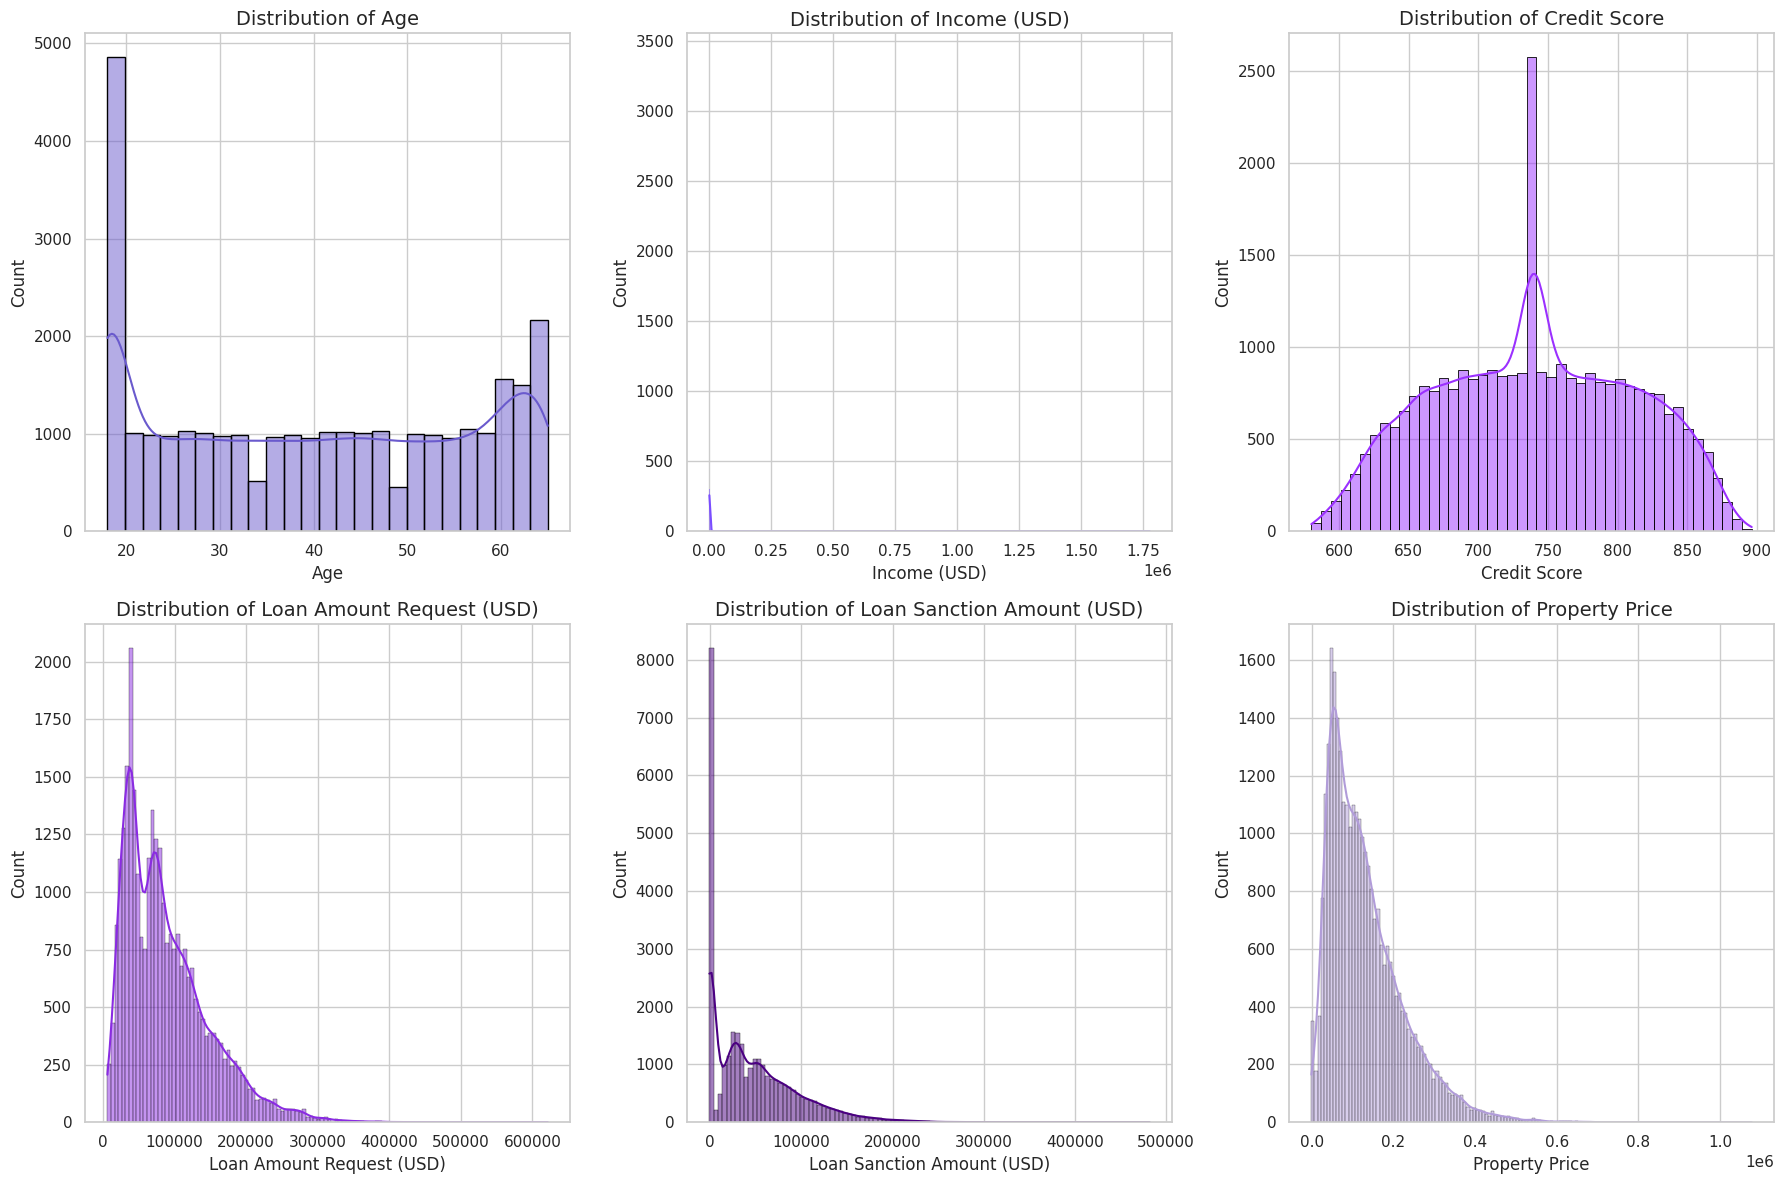

In [68]:
# List of features
mini_features = ['Age', 'Income (USD)', 'Credit Score', 
                 'Loan Amount Request (USD)', 'Loan Sanction Amount (USD)', 
                 'Property Price']

# Define a custom black-to-purple gradient color palette
custom_palette = ['#6A5ACD', '#7A4DFF', '#9B30FF', '#8A2BE2', '#4B0082', '#B19CD9']

# Set the style for the plot
sns.set_style('whitegrid')

# Create the figure
plt.figure(figsize=(18, 12))

# Loop over the features and plot the histograms with KDE
for idx, feature in enumerate(mini_features):
    plt.subplot(2, 3, idx+1)
    sns.histplot(df[feature], kde=True, edgecolor='black', color=custom_palette[idx % 6])
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### 21. Visualizing Correlations Among Key Numerical Features
Plotting a heatmap to examine the relationships between selected important numerical features in the dataset.


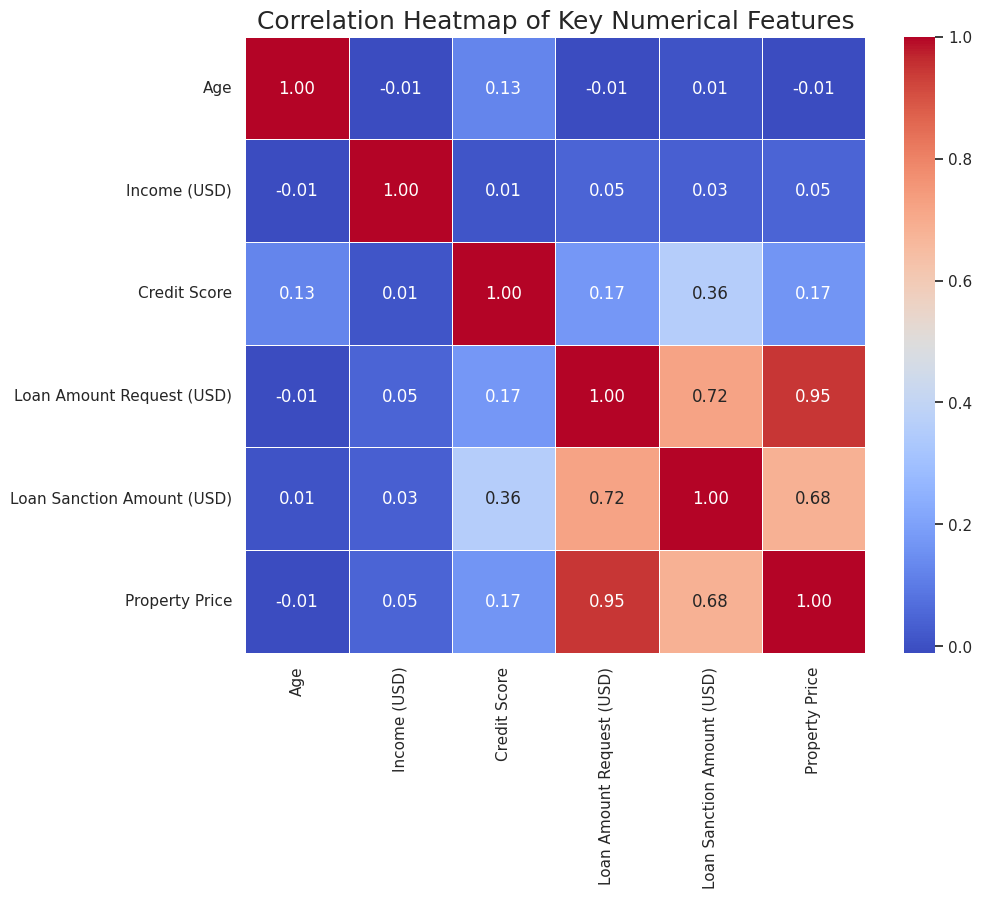

In [70]:
plt.figure(figsize=(10,8))
corr = df[mini_features].corr()

sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Numerical Features', fontsize=18)
plt.show()


# Regression

### 22. Preparing Data and Training Multiple Regression Models

Selecting features, handling missing values, splitting the dataset, and training three regression models.

- Selected features: **Age**, **Income (USD)**, **Credit Score**, **Property Price**, **Loan Amount Request (USD)**, **Current Loan Expenses (USD)**.
- Target variable: **Loan Sanction Amount (USD)**.
- Dropped rows with missing values.
- Split into **training** and **testing** sets (80%-20%).
- Trained models:
  - **Linear Regression**
  - **Decision Tree Regressor**
  - **Random Forest Regressor**

**Highlights**: `train_test_split`, `dropna()`, `LinearRegression()`, `DecisionTreeRegressor()`, `RandomForestRegressor()`


In [74]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from rich.console import Console

# Initialize the console for rich text output
console = Console()

# 1. Selecting Features and Target
x = df[['Age', 'Income (USD)', 'Credit Score', 'Property Price', 
        'Loan Amount Request (USD)', 'Current Loan Expenses (USD)']]
y = df['Loan Sanction Amount (USD)']

# 2. Handling Missing Values Properly
xy = pd.concat([x, y], axis=1)   # Combine x and y
xy = xy.dropna()                 # Drop rows where any NaN exists
x = xy.drop(columns=['Loan Sanction Amount (USD)'])
y = xy['Loan Sanction Amount (USD)']

console.print("Successfully selected features and dropped NaNs.", style="bold #6A5ACD")

# 3. Splitting Data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
console.print("Split data into train and test sets.", style="bold black")

# 4. Training Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
console.print("Linear Regression model training complete.", style="bold #6A5ACD")

# Predictions for Linear Regression
lr_pred = lr_model.predict(x_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
console.print(f"Linear Regression - MSE: {lr_mse:.2f}, R²: {lr_r2:.2f}", style="bold black")

# 5. Training Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
console.print("Decision Tree model training complete.", style="bold #6A5ACD")

# Predictions for Decision Tree
dt_pred = dt_model.predict(x_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
console.print(f"Decision Tree - MSE: {dt_mse:.2f}, R²: {dt_r2:.2f}", style="bold black")

# 6. Training Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)
console.print("Random Forest model training complete.", style="bold #6A5ACD")

# Predictions for Random Forest
rf_pred = rf_model.predict(x_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
console.print(f"Random Forest - MSE: {rf_mse:.2f}, R²: {rf_r2:.2f}", style="bold black")


Successfully selected features and dropped NaNs.

Split data into train and test sets.

Linear Regression model training complete.

Linear Regression - MSE: 1046844510.26, R²: 0.54

Decision Tree model training complete.

Decision Tree - MSE: 1607558284.61, R²: 0.30

Random Forest model training complete.

Random Forest - MSE: 837735326.17, R²: 0.63

### 23. Making Predictions on the Test Set

Using trained models to predict `Loan Sanction Amount (USD)` on unseen test data.

- Predicted values using:
  - **Linear Regression**
  - **Decision Tree**
  - **Random Forest**
- Stored results for later evaluation.

**Highlights**: `predict()`

In [76]:
# 2. Making predictions
# Linear Regression
y_pred_lr = lr_model.predict(x_test)

# Decision Tree
y_pred_dt = dt_model.predict(x_test)

# Random Forest
y_pred_rf = rf_model.predict(x_test)

# Print messages with alternating colors
console.print("Predictions generated for all models.", style="bold #6A5ACD")  # Color 1: #6A5ACD (Medium Slate Blue)


Predictions generated for all models.

### 24. Evaluating Model Performance

Measuring accuracy using **R² Score** and **Mean Squared Error** for each model.

- Printed evaluation metrics:
  - **Linear Regression** performance
  - **Decision Tree** performance
  - **Random Forest** performance
- Compared models on test set accuracy.

**Highlights**: `mean_squared_error()`, `r2_score()`


In [78]:
# Evaluating models
# Linear Regression Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
console.print(f"Linear Regression - MSE: {mse_lr:.2f}", style="bold #6A5ACD")  # Constant color: #6A5ACD (Medium Slate Blue)
console.print(f"Linear Regression - R2 Score: {r2_lr:.2f}", style="bold #6A5ACD")

# Decision Tree Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
console.print(f"Decision Tree - MSE: {mse_dt:.2f}", style="bold #6A5ACD")
console.print(f"Decision Tree - R2 Score: {r2_dt:.2f}", style="bold #6A5ACD")

# Random Forest Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
console.print(f"Random Forest - MSE: {mse_rf:.2f}", style="bold #6A5ACD")
console.print(f"Random Forest - R2 Score: {r2_rf:.2f}", style="bold #6A5ACD")


Linear Regression - MSE: 1046844510.26

Linear Regression - R2 Score: 0.54

Decision Tree - MSE: 1607558284.61

Decision Tree - R2 Score: 0.30

Random Forest - MSE: 837735326.17

Random Forest - R2 Score: 0.63

### 25. Comparing Model Performance Using R² Scores

Visualizing R² scores of different models to compare their predictive strength.

- Created a **bar plot** showing:
  - **Linear Regression**
  - **Decision Tree**
  - **Random Forest**
- Displayed **R² values** above each bar.
- Set y-axis limit from **0 to 1** for consistency.

**Highlights**: `plt.bar()`, `plt.text()`, `R² Score Comparison`

In [67]:
#Model Comparison Visualization

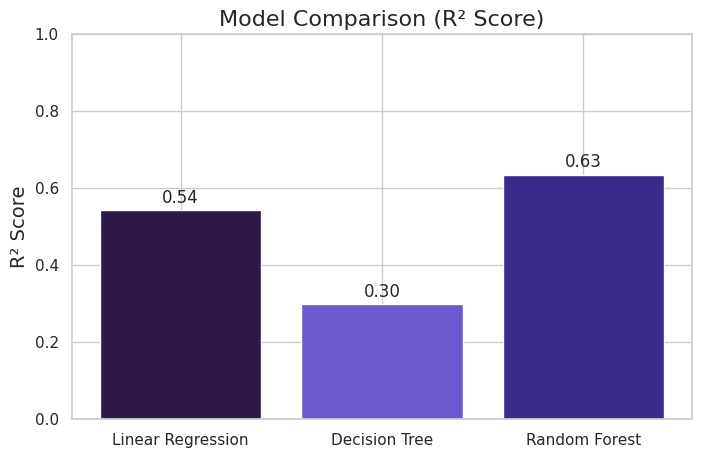

In [82]:
import matplotlib.pyplot as plt

# Models and R² Scores
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [r2_lr, r2_dt, r2_rf]

# Set figure size
plt.figure(figsize=(8,5))

# Use earthy, darker purple tones
colors = ['#2E1A47', '#6A5ACD', '#3C2A8D']  # Earthier dark purples

# Create the bar chart
bars = plt.bar(models, r2_scores, color=colors)
plt.ylim(0, 1)
plt.title('Model Comparison (R² Score)', fontsize=16)
plt.ylabel('R² Score', fontsize=14)

# Adding scores on top of the bars
for bar, score in zip(bars, r2_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{score:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()


### 30. Summarizing Model Metrics in a DataFrame

Tabulating and displaying R² scores and Mean Squared Errors for quick comparison.

- Built a **DataFrame** summarizing:
  - **Model names**
  - **R² Scores**
  - **Mean Squared Errors (MSE)**
- Printed the final model performance table.

**Highlights**: `pd.DataFrame()`, `colored()`, **Performance Summary**

In [87]:
from rich.console import Console
from rich.table import Table

# Initialize the console for rich text
console = Console()

# Create a DataFrame for the results
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'R² Score': [r2_lr, r2_dt, r2_rf],
    'MSE': [mse_lr, mse_dt, mse_rf]
})

# Print the header with purple color
console.print("\n📈 Model Performance Summary:", style="bold #6A5ACD")  # Purple color for header

# Create a table with dynamic column widths
table = Table(show_header=True, header_style="bold #6A5ACD")

# Add columns dynamically based on the data
table.add_column("Model", justify="center")
table.add_column("R² Score", justify="center")
table.add_column("MSE", justify="center")

# Add rows to the table
for index, row in results_df.iterrows():
    table.add_row(row['Model'], f"{row['R² Score']:.4f}", f"{row['MSE']:.4f}")

# Print the table
console.print(table)


📈 Model Performance Summary:

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃       Model       ┃ R² Score ┃       MSE       ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Linear Regression │  0.5427  │ 1046844510.2608 │
│   Decision Tree   │  0.2977  │ 1607558284.6055 │
│   Random Forest   │  0.6340  │ 837735326.1698  │
└───────────────────┴──────────┴─────────────────┘